# Pagerank Algorithm

In [4]:
import numpy as np

def page_rank_algorithm(graph,damping_factor):
    outgoing = dict()
    incoming_nodes = dict()
    coefficients = dict()
    for i in range(len(graph)):
        outgoing[i]=0

    for i,node in enumerate(graph):
        for edge in node:
            if edge:
                outgoing[i] += 1

    for i in range(len(graph)):
        temp=[]
        for node in graph:
            if node[i]:
                temp.append(node)
        incoming_nodes[i] = temp

    for i,node in enumerate(graph):
        temp = []
        for j,other_node in enumerate(graph):
            if other_node in incoming_nodes[i]:
                temp.append(damping_factor*(1.0/outgoing[j]))
            elif i == j:
                temp.append(-1)
            else:
                temp.append(0)
        coefficients[i] = temp

    coefficients_list = []
    for key,value in coefficients.items():
        coefficients_list.append(value)

    constant_matrix = []
    for i in range(len(graph)):
        constant_matrix.append(damping_factor-1)

    pageranks = np.linalg.solve(np.array(coefficients_list),np.array(constant_matrix))
    print()
    for i,rank in enumerate(pageranks):
        print('Page Rank of {} is {:.4f}'.format(chr(65+i), rank))

def main():
    n = int(input('Enter the number of nodes : '))
    d = float(input('Enter the damping factor : '))
    graph = []
    print('Enter Adjacency Matrix with terms separated by a space : ')
    for i in range(n):
        temp_list = input().split(' ')
        graph.append(list(map(int,temp_list)))
    page_rank_algorithm(graph,d)

main()

Enter Adjacency Matrix with terms separated by a space : 

Page Rank of A is 0.9677
Page Rank of B is 0.9677
Page Rank of C is 1.3871
Page Rank of D is 0.6774


# HITS Algorithm

Enter the connection between the nodes: 
Edge 1: 
Edge 2: 
Edge 3: 
Edge 4: 
Edge 5: 
Edge 6: 
Edge 7: 
Edge 8: 
Edge 9: 
Edge 10: 
Edge 11: 
Edge 12: 
Edge 13: 
Edge 14: 

Hub Scores: 
('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'A'),('D', 'C'), ('E', 'D'), ('E', 'B'), ('E', 'F'),('E', 'C'), ('F', 'C'), ('F', 'H'), ('G', 'A'), ('G', 'C'), ('H', 'A'): 0.6180339887498949
: 0.3819660112501052

Authority Scores: 
('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'A'),('D', 'C'), ('E', 'D'), ('E', 'B'), ('E', 'F'),('E', 'C'), ('F', 'C'), ('F', 'H'), ('G', 'A'), ('G', 'C'), ('H', 'A'): 0.38196601125010515
: 0.6180339887498949


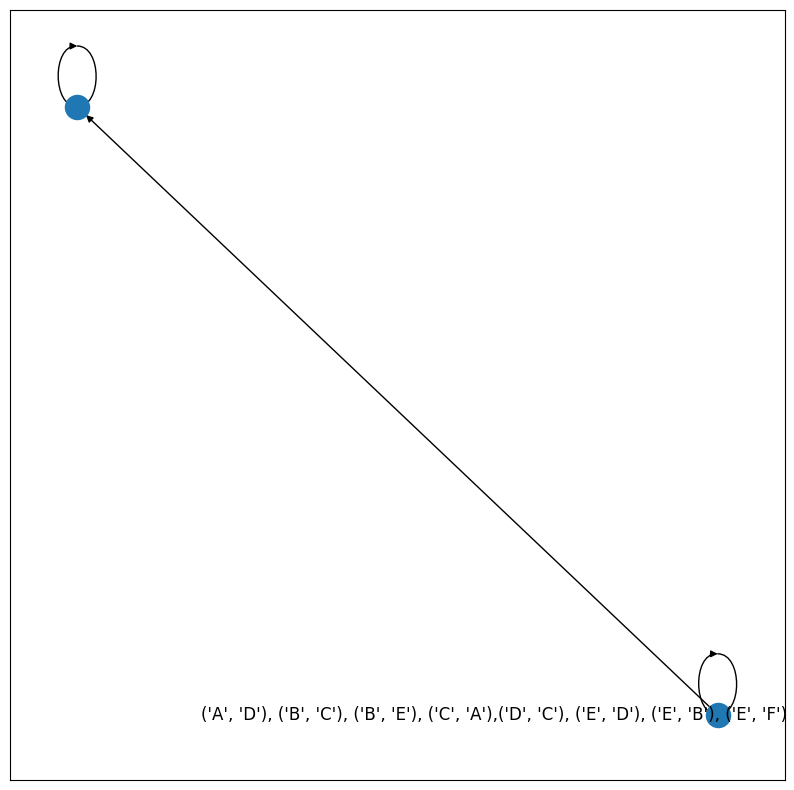

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

connections = []
edges = int(input('Enter the number of edges: '))
print('Enter the connection between the nodes: ')
for i in range(edges):
  print(f'Edge {i + 1}: ')
  start = input('Enter start node: ')
  end = input('Enter end node: ')
  connections.append((start, end))
print()

# ('A', 'D'), ('B', 'C'), ('B', 'E'), ('C', 'A'),('D', 'C'), ('E', 'D'), ('E', 'B'), ('E', 'F'),('E', 'C'), ('F', 'C'), ('F', 'H'), ('G', 'A'),
# ('G', 'C'), ('H', 'A')

G.add_edges_from(connections)
plt.figure(figsize = (10, 10))
nx.draw_networkx(G, with_labels = True)

hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)

print("Hub Scores: ")
for key, value in hubs.items():
  print(f'{key}: {value}')
print()

print("Authority Scores: ")
for key, value in authorities.items():
  print(f'{key}: {value}')